In [1]:
#import nessary  modules for data  processing
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np

#import matplotlib.pyplot for plotting graph
import matplotlib.pyplot as plt    
import seaborn as sns  


In [2]:
#Get the dataset from file
file = r"C:\Users\HP\OneDrive\school\OneDrive\Documents\GitHub\Dataset-\DATA\Nyayo Embakasi.csv"

df = pd.read_csv(file)

#Inspect the first few rows
df.head()

#Inspect the dataset
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    1744 non-null   int64  
 1   location_name  1744 non-null   object 
 2   parameter      1744 non-null   object 
 3   value          1744 non-null   float64
 4   unit           1744 non-null   object 
 5   datetimeUtc    1744 non-null   object 
 6   datetimeLocal  1744 non-null   object 
 7   timezone       1744 non-null   object 
 8   latitude       1744 non-null   float64
 9   longitude      1744 non-null   float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     1744 non-null   object 
 14  provider       1744 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 204.5+ KB


In [3]:
#Conduct basic data inspection and cleaning of the data set
#Find missing values
df.isnull().sum()

# Check data types
print(df.dtypes)

#fill in the missing values
df['country_iso'].fillna("KEN",  inplace=True)

#save the modified dataset
df.to_csv("file", index=False)

df


location_id        int64
location_name     object
parameter         object
value            float64
unit              object
datetimeUtc       object
datetimeLocal     object
timezone          object
latitude         float64
longitude        float64
country_iso      float64
isMobile         float64
isMonitor        float64
owner_name        object
provider          object
dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_20460\838169753.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'KEN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['country_iso'].fillna("KEN",  inplace=True)


,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2388059,"Nyayo Embakasi, Nairobi",temperature,28.0,c,2024-02-06T05:00:00+00:00,2024-02-06T08:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
1,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T06:00:00+00:00,2024-02-06T09:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
2,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T07:00:00+00:00,2024-02-06T10:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
3,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T08:00:00+00:00,2024-02-06T11:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
4,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T10:00:00+00:00,2024-02-06T13:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,2388059,"Nyayo Embakasi, Nairobi",pm10,5.4,µg/m³,2024-03-18T00:00:00+00:00,2024-03-18T03:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
1740,2388059,"Nyayo Embakasi, Nairobi",pm1,27.0,µg/m³,2024-03-09T18:00:00+00:00,2024-03-09T21:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
1741,2388059,"Nyayo Embakasi, Nairobi",pm1,7.6,µg/m³,2024-03-09T19:00:00+00:00,2024-03-09T22:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
1742,2388059,"Nyayo Embakasi, Nairobi",pm10,53.0,µg/m³,2024-03-09T18:00:00+00:00,2024-03-09T21:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient


In [4]:
# Find the highest and lowest recorded temperatures in the dataset
highest_temperature =df["value"].max()
lowest_temperature = df["value"].min()

print(f'Highest Recorded Temperature: {highest_temperature} °C')
print(f'Lowest Recorded Temperature: {lowest_temperature} °C')

Highest Recorded Temperature: 32000.0 °C
Lowest Recorded Temperature: 3.2 °C


In [5]:
#this function filters the dataframe by parameter value
def filter_parameters(df, parameter_value):
    filtered_df = df[df['parameter'] == parameter_value]
    return filtered_df

A = filter_parameters(df, 'temperature')
A.head()







,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2388059,"Nyayo Embakasi, Nairobi",temperature,28.0,c,2024-02-06T05:00:00+00:00,2024-02-06T08:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
1,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T06:00:00+00:00,2024-02-06T09:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
2,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T07:00:00+00:00,2024-02-06T10:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
3,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T08:00:00+00:00,2024-02-06T11:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient
4,2388059,"Nyayo Embakasi, Nairobi",temperature,27.0,c,2024-02-06T10:00:00+00:00,2024-02-06T13:00:00+03:00,Africa/Nairobi,-1.304011,36.907681,KEN,NaN,NaN,AirGradient,AirGradient


Lowest Recorded Temperature: 24.0 °C
Highest Recorded Temperature: 30.0 °C
Average Temperature: 27.62 °C
starndand deviation: 0.77 °C


(array([  1.,   0.,   2.,   0.,  32.,   0., 243.,   0., 309.,   0.,  62.,
          3.]),
 array([24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. , 28.5, 29. ,
        29.5, 30. ]),
 <BarContainer object of 12 artists>)

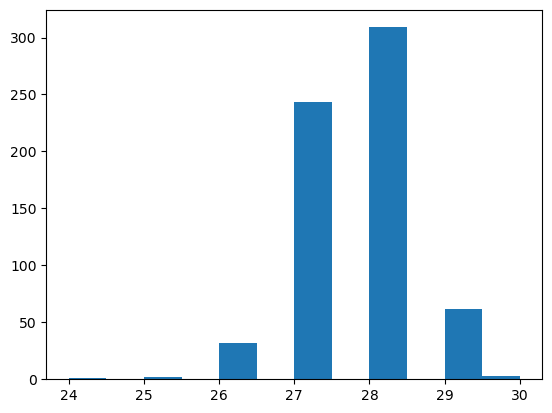

In [38]:
#get the highest and lowest temperatures recorded in a given period
highest_temperature = max(A["value"])
lowest_temperature = min(A["value"])

print(f'Lowest Recorded Temperature: {lowest_temperature} °C')
print(f'Highest Recorded Temperature: {highest_temperature} °C')

print(f'Average Temperature: {round(sum(A["value"])/len(A["value"]), 2)} °C')
print(f'starndand deviation: {round(np.std(A["value"]), 2)} °C')

#plot a histogram of the temperature data
plt.hist(A["value"], bins=12)